In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps
from sklearn.metrics import *

In [2]:
classes = 10

dataset = pd.read_csv(r"C:\Users\amish\Desktop\PYTHON\Deep Learning\digit-recognizer\train.csv")

pixels_X = dataset.loc[:,'pixel0':'pixel783']
labels_Y = dataset.loc[:,'label']

X = np.array(pixels_X, dtype=int)
Y = np.array(labels_Y)
X.shape = (X.shape[0],28,28,1)
Y.shape = (Y.shape[0],1)

dataset_test = pd.read_csv(r"C:\Users\amish\Desktop\PYTHON\Deep Learning\digit-recognizer\test.csv")

pixels_X_test = dataset_test.loc[:]
X_test = np.array(pixels_X_test, dtype=int)
X_test.shape = (X_test.shape[0],28,28,1)

def one_hot_encoding(y):
    y_hot = np.zeros((y.shape[0], 10))
    count=0
    for c in y:
        y_hot[count][c] = 1
        count += 1
    return y_hot

def array_to_image(arr):
    s = arr.shape[0]
    arr.shape = (s,s)
    data = Image.fromarray(arr)
    data.show()

#array_to_image(X[1234][:])
#print(Y[1234])

Y_encoded = one_hot_encoding(Y)
#print(Y_encoded)


# Rescaling the image pixels to 0-1
X_norm = X / 255.0
print("Normalized input data shape: ", X_norm.shape)

Normalized input data shape:  (42000, 28, 28, 1)


In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X_norm, Y_encoded, test_size=0.1, shuffle=True)

print("Training data size: ", X_train.shape)
print("Validation data size: ",X_val.shape)

Training data size:  (37800, 28, 28, 1)
Validation data size:  (4200, 28, 28, 1)


In [25]:
# Initializing kernels to random values using a normal distribution.
initializer = tf.keras.initializers
layers = tf.keras.layers

# Layer 1 (Input layer)
mnist_input = tf.keras.Input(shape=(28,28,1), name='image_input')

# Layer 2
x = layers.Conv2D(16, 2, activation='sigmoid', name='Conv2D_1', padding='same')(mnist_input)      
x = layers.AveragePooling2D(pool_size=(2,2), name='AvgPool_1')(x)               
x = layers.Conv2D(32, 3, activation='sigmoid', name='Conv2D_2')(x)                
x = layers.MaxPool2D(pool_size=(2,2), name='maxPool_1')(x)                                                         

# Layer 3
x = layers.Conv2D(32, 3, activation='relu', name='Conv2D_3', padding='same')(x)
x = layers.AveragePooling2D(pool_size=(2,2), name='AvgPool_2', padding='same')(x) 
x = layers.Conv2D(16, 3, activation='relu', name='Conv2D_4', padding='same')(x)                
x = layers.MaxPool2D(pool_size=(2,2), name='maxPool_2')(x)                                                         

# Layer 4
x = layers.Flatten()(x)   
x = layers.Dense(128, activation='relu', name='Dense_1')(x)
x = layers.Dense(64, activation='relu', name='Dense_2')(x)    

# Layer 5
output = layers.Dense(10, activation='softmax', name='Output_layer')(x)



model = tf.keras.Model(mnist_input, output, name='mnist_model')
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', 'mse'])

print(model.summary())

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 Conv2D_1 (Conv2D)           (None, 28, 28, 16)        80        
                                                                 
 AvgPool_1 (AveragePooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 Conv2D_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 maxPool_1 (MaxPooling2D)    (None, 6, 6, 32)          0         
                                                                 
 Conv2D_3 (Conv2D)           (None, 6, 6, 32)          9248      
                                                       

In [26]:
'''
    The fit() call returns a "history" object which records what happened over the course of training. 
    The history.history dict contains per-epoch timeseries of metrics values 
'''
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1,
                    validation_split=0.25, validation_freq=1)

Epoch 1/10
886/886 [==============================] - 18s 19ms/step - loss: 1.8393 - accuracy: 0.3047 - mse: 0.0747 - val_loss: 0.7104 - val_accuracy: 0.7693 - val_mse: 0.0332
Epoch 2/10
886/886 [==============================] - 15s 17ms/step - loss: 0.4442 - accuracy: 0.8497 - mse: 0.0216 - val_loss: 0.2736 - val_accuracy: 0.9120 - val_mse: 0.0132
Epoch 3/10
886/886 [==============================] - 17s 20ms/step - loss: 0.2274 - accuracy: 0.9280 - mse: 0.0109 - val_loss: 0.1965 - val_accuracy: 0.9378 - val_mse: 0.0093
Epoch 4/10
886/886 [==============================] - 17s 20ms/step - loss: 0.1691 - accuracy: 0.9460 - mse: 0.0082 - val_loss: 0.1389 - val_accuracy: 0.9558 - val_mse: 0.0066
Epoch 5/10
886/886 [==============================] - 17s 19ms/step - loss: 0.1381 - accuracy: 0.9552 - mse: 0.0067 - val_loss: 0.1493 - val_accuracy: 0.9521 - val_mse: 0.0072
Epoch 6/10
886/886 [==============================] - 17s 19ms/step - loss: 0.1190 - accuracy: 0.9604 - mse: 0.0058 - va

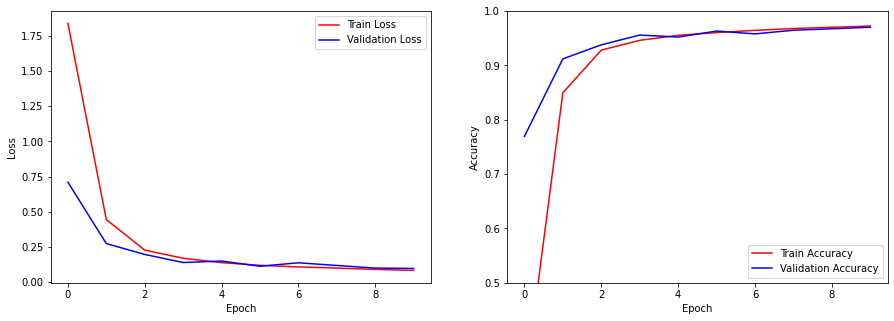

In [27]:
def plot_metrics(hist):
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']

    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.plot(train_loss, 'r')
    ax1.plot(val_loss, 'b')
    ax1.legend(['Train Loss', 'Validation Loss'])

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_ylim(0.5,1)
    ax2.plot(train_acc, 'r')
    ax2.plot(val_acc, 'b')
    ax2.legend(['Train Accuracy', 'Validation Accuracy'])
        
plot_metrics(history)

In [28]:
y_pred = model.predict(X_val)

132/132 [==============================] - 1s 8ms/step


In [29]:
diff = np.argmax(y_pred, axis=1) - np.argmax(Y_val, axis=1)
incorrect_pred = np.count_nonzero(diff)

acc = 1-(incorrect_pred/X_val.shape[0]) 
acc

0.9707142857142858

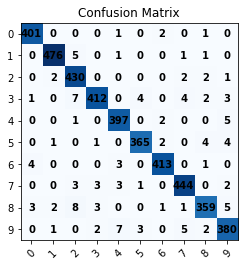

In [30]:
def normalize_ypred(y):
    y_hot = np.zeros(y.shape)
    count=0
    for val in np.argmax(y, axis=1):
        y_hot[count][val] = 1
        count += 1
    return y_hot

y_pred_f = normalize_ypred(y_pred)
y_pred_f
conf_matrix = confusion_matrix(np.argmax(Y_val, axis=1), np.argmax(y_pred_f, axis=1))

def plt_confusion_matrix(cm, n=range(10), cmap=plt.cm.Blues):
    plt.imshow(conf_matrix, cmap=cmap)
    plt.title('Confusion Matrix')
    plt.xticks(n, rotation=45)
    plt.yticks(n)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i][j], fontweight='semibold', 
                        horizontalalignment='center', 
                        verticalalignment='center', fontsize=10)

plt_confusion_matrix(conf_matrix)

In [34]:
print(classification_report(Y_val, y_pred_f))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       405
           1       0.99      0.98      0.99       484
           2       0.95      0.98      0.97       437
           3       0.98      0.95      0.96       433
           4       0.96      0.98      0.97       405
           5       0.98      0.97      0.97       377
           6       0.98      0.98      0.98       421
           7       0.97      0.97      0.97       456
           8       0.97      0.94      0.95       382
           9       0.95      0.95      0.95       400

   micro avg       0.97      0.97      0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200
 samples avg       0.97      0.97      0.97      4200



In [62]:
array_to_image(X_val[100]*255.0)

In [63]:
model.predict(X_val[100])

InvalidArgumentError: Graph execution error:

Detected at node 'mnist_model/Conv2D_1/BiasAdd' defined at (most recent call last):
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\amish\AppData\Local\Temp\ipykernel_3288\3572622506.py", line 1, in <cell line: 1>
      model.predict(X_val[1])
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\amish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 269, in call
      outputs = tf.nn.bias_add(
Node: 'mnist_model/Conv2D_1/BiasAdd'
input must be 4-dimensional[28,28,1]
	 [[{{node mnist_model/Conv2D_1/BiasAdd}}]] [Op:__inference_predict_function_122645]